In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
import pickle

In [4]:
a = pd.read_csv('/content/car data.csv')
print(a)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [6]:
a.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
a.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
print(a.shape)

(301, 9)


In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
print(a['Seller_Type'].unique())

['Dealer' 'Individual']


In [11]:
print(a.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [14]:
print(a.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [15]:
f_dataset = a[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
f_dataset['Current_Year'] = 2024
f_dataset['no_year']= f_dataset['Current_Year']-f_dataset['Year']


In [16]:
f_dataset.drop(['Year','Current_Year',],axis=1,inplace = True)

In [17]:
f_dataset = pd.get_dummies(f_dataset,drop_first = True)

In [18]:
print(f_dataset.head())

   Selling_Price  Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  \
0           3.35           5.59       27000      0       10             False   
1           4.75           9.54       43000      0       11              True   
2           7.25           9.85        6900      0        7             False   
3           2.85           4.15        5200      0       13             False   
4           4.60           6.87       42450      0       10              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True  


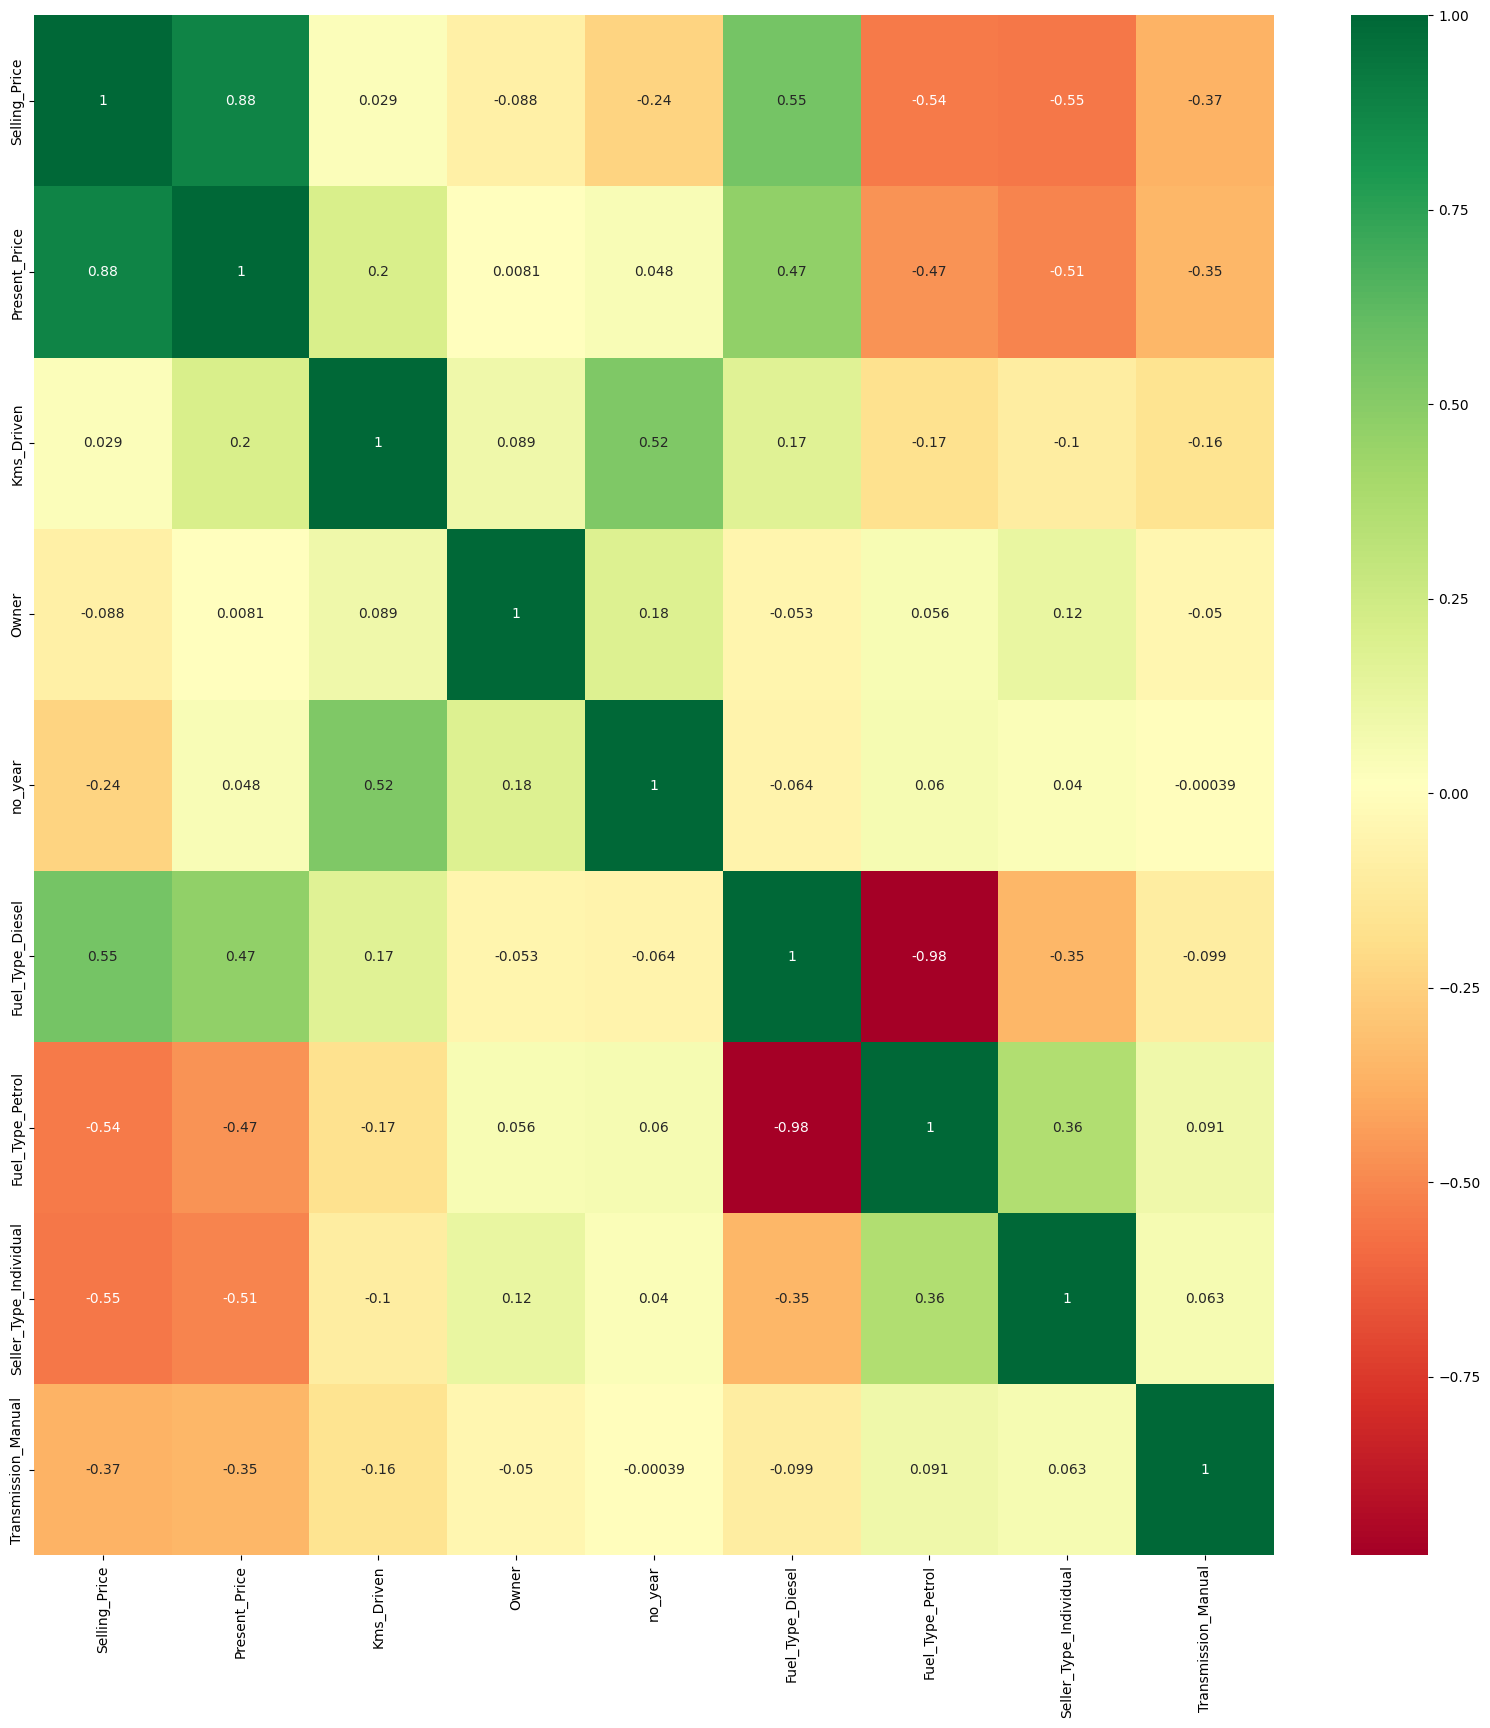

In [19]:
corrmat = f_dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot = True,cmap="RdYlGn")
plt.show()

In [20]:
x= f_dataset.iloc[:,1:]
y= f_dataset.iloc[:,0]

In [23]:
print(x['Owner'].unique())
print(x.head())
print(y.head())

[0 1 3]
   Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  \
0           5.59       27000      0       10             False   
1           9.54       43000      0       11              True   
2           9.85        6900      0        7             False   
3           4.15        5200      0       13             False   
4           6.87       42450      0       10              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True  
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [26]:
model = ExtraTreesRegressor()
model.fit(x,y)
f_importances = pd.Series(model.feature_importances_,index=x.columns)
f_importances.nlargest(5)
plt.show()

In [27]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [30]:
random_grid={
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf'  : min_samples_leaf
}

In [31]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

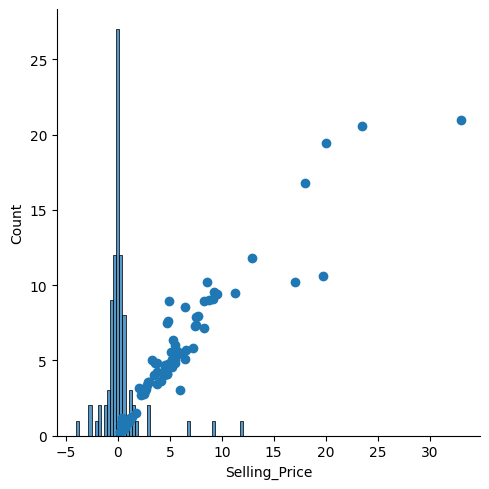

In [36]:
predictions = rf_random.predict(x_test)
sns.displot(y_test - predictions)
plt.scatter(y_test,predictions)
plt.show()

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Save the model to a file
with open('random_forest_regression_model.pkl', 'wb') as file:
    pickle.dump(rf_random, file)

MAE: 0.8913491208791232
MSE: 3.9468725989923135
RMSE: 1.9866737525301716


In [39]:
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

# Load the pre-trained model
model = pickle.load(open('random_forest_regression_model.pkl', 'rb'))

# Initialize StandardScaler (used if needed, though not actively used in the provided code)
standard_to = StandardScaler()

# Function to take user input and make predictions
def predict_car_price():
    # Getting user input
    year = int(input("Enter the car's manufacturing year (e.g., 2015): "))
    present_price = float(input("Enter the car's present price (e.g., 5.6): "))
    kms_driven = int(input("Enter the total kilometers driven (e.g., 50000): "))
    owner = int(input("Enter the number of previous owners (0 or 1 or 2): "))

    fuel_type = input("Enter the fuel type (Petrol/Diesel): ")
    if fuel_type == 'Petrol':
        fuel_type_petrol = 1
        fuel_type_diesel = 0
    else:
        fuel_type_petrol = 0
        fuel_type_diesel = 1

    seller_type = input("Is the seller an Individual or Dealer (Individual/Dealer): ")
    if seller_type == 'Individual':
        seller_type_individual = 1
    else:
        seller_type_individual = 0

    transmission_type = input("Is the transmission Manual or Automatic (Manual/Automatic): ")
    if transmission_type == 'Manual':
        transmission_manual = 1
    else:
        transmission_manual = 0

    # Preprocessing the inputs
    kms_driven_log = np.log(kms_driven)  # Log-transform kilometers driven
    year = 2020 - year  # Calculate the age of the car

    # Making the prediction
    prediction = model.predict([[present_price, kms_driven_log, owner, year, fuel_type_diesel, fuel_type_petrol, seller_type_individual, transmission_manual]])

    # Output the result
    output = round(prediction[0], 2)
    if output < 0:
        print("Sorry, you cannot sell this car.")
    else:
        print(f"You can sell the car at approximately: ₹{output}")

# Call the function to make a prediction
predict_car_price()


Enter the car's manufacturing year (e.g., 2015): 2024
Enter the car's present price (e.g., 5.6): 1000
Enter the total kilometers driven (e.g., 50000): 1000
Enter the number of previous owners (0 or 1 or 2): 0
Enter the fuel type (Petrol/Diesel): 1
Is the seller an Individual or Dealer (Individual/Dealer): 1
Is the transmission Manual or Automatic (Manual/Automatic): 1
You can sell the car at approximately: ₹22.25


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
